In [26]:
import pandas as pd
import numpy as ny
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("CAR.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
print(df['seller_type'].unique())
print(df['owner'].unique())
print(df['transmission'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Manual' 'Automatic']


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
x = df.iloc[:,[6,5,4,1,3]].values
y = df.iloc[:,2].values
y
x.shape

(4340, 5)

<AxesSubplot:>

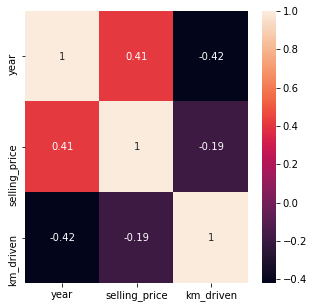

In [24]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True, ax=ax)

In [3]:
from sklearn.model_selection import train_test_split
#split data for training and testing
#train 50%
#test 50%
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

NameError: name 'x' is not defined

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,2):
  x[:,i] = le.fit_transform(x[:,i])
x

array([[1, 1, 4, 13, 70000],
       [1, 1, 4, 13, 50000],
       [1, 1, 1, 18, 100000],
       ...,
       [1, 1, 4, 15, 83000],
       [1, 1, 1, 22, 90000],
       [1, 1, 4, 22, 40000]], dtype=object)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ValueError: could not convert string to float: 'Manual'

In [2]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
y_pred = reg.predict(x_test)

NameError: name 'x_train' is not defined

In [ ]:
df = df.rename(index={0:'Actual',1:'Predicted'})
final = df.transpose().round(2)


In [ ]:
print(reg.score(X_test,y_test))